In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import json
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [ ]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: the mode of the player count by college is {modeCollege}, which makes sense because {singleCollege_sum} of the colleges only sent one player to the NBA! ")

In [2]:
# Files to Load
player_data_to_load = os.path.join("player_data_cleaned.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")

#pd.read_csv(r"C:\test.csv",usecols=[2])

budgets_2009_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2008-2009.csv")
budgets_2010_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2009-2010.csv")
budgets_2011_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2010-2011.csv")
budgets_2012_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2011-2012.csv")
budgets_2013_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2012-2013.csv")
budgets_2014_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2013-2014.csv")
budgets_2015_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2014-2015.csv")
budgets_2016_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2015-2016.csv")
budgets_2017_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2016-2017.csv")

# Read the Player and Season Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")

# Read the Budget Data From 2008-2017
budget2009_data_df = pd.read_csv(budgets_2009_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2010_data_df = pd.read_csv(budgets_2010_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2011_data_df = pd.read_csv(budgets_2011_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2012_data_df = pd.read_csv(budgets_2012_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2013_data_df = pd.read_csv(budgets_2013_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2014_data_df = pd.read_csv(budgets_2014_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2015_data_df = pd.read_csv(budgets_2015_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])
budget2016_data_df = pd.read_csv(budgets_2016_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])
budget2017_data_df = pd.read_csv(budgets_2017_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])

#budget2009_data_df.head()
#budget2010_data_df.head()
#budget2011_data_df.head()
#budget2012_data_df.head()
#budget2013_data_df.head()
#budget2014_data_df.head()
#budget2015_data_df.head()
#budget2016_data_df.head()
#budget2017_data_df.head()


# Combine the data into a single dataset
#pyber_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

#pyber_data_complete.to_csv("testData.csv", index=False, header=True)

# Display the data table for preview
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947",University of California-Los Angeles
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University and Agricultural & ...
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [3]:
#University of California, Los Angeles	University of California-Los Angeles#
#University of North Carolina	University of North Carolina at Chapel Hill
#Indiana University	Indiana University-Bloomington
#St. John's University	St. John's University-New York
#University of Michigan	University of Michigan-Ann Arbor
#Ohio State University	Ohio State University-Main Campus
#North Carolina State University	North Carolina State University at Raleigh
#University of Minnesota	University of Minnesota-Twin Cities
#University of Maryland	University of Maryland-College Park
#Louisiana State University	Louisiana State University and Agricultural & Mechanical College
#Georgia Institute of Technology	Georgia Institute of Technology-Main Campus
#University of Nevada, Las Vegas	University of Nevada-Las Vegas

In [4]:
#Number of unique colleges
unique_college = player_data_df['college'].nunique()
unique_college

473

In [5]:
# Inspect budget data from U.S. Department of Education 2017 https://ope.ed.gov/athletics/#/datafile/list
budget2017_data_df.head()

,institution_name,city_txt,classification_name,EFTotalCount,PARTIC_MEN,OPEXPPERPART_MEN,OPEXPPERTEAM_MEN,TOTAL_OPEXP_INCLCOED,MEN_FTHEADCOACH_MALE,MEN_PTHEADCOACH_MALE,...,TOTAL_REV_COED,REVENUE_MENALL,TOTAL_REVENUE_ALL,EXP_MEN,TOTAL_EXP_MENWOMEN,EXP_COED_MEN,TOTAL_EXP_COED,EXPENSE_MENALL,TOTAL_EXPENSE_ALL,Sports
0,Alabama A & M University,Normal,NCAA Division I-FCS,4211,35.0,4443.0,155495.0,155495,1.0,NaN,...,NaN,516227,516227,516227.0,516227.0,NaN,NaN,516227,516227,Baseball
1,Alabama A & M University,Normal,NCAA Division I-FCS,4211,15.0,15111.0,226663.0,453096,1.0,NaN,...,NaN,824939,1694668,824939.0,1694668.0,NaN,NaN,824939,1694668,Basketball
2,Alabama A & M University,Normal,NCAA Division I-FCS,4211,53.0,986.0,52260.0,119613,NaN,NaN,...,NaN,232691,598724,232691.0,598724.0,NaN,NaN,232691,598724,All Track Combined
3,Alabama A & M University,Normal,NCAA Division I-FCS,4211,108.0,5437.0,587221.0,587221,1.0,NaN,...,NaN,2996306,2996306,2996306.0,2996306.0,NaN,NaN,2996306,2996306,Football
4,Alabama A & M University,Normal,NCAA Division I-FCS,4211,7.0,2980.0,20858.0,20858,NaN,1.0,...,NaN,117942,117942,117942.0,117942.0,NaN,NaN,117942,117942,Golf


In [6]:
#Read in specific columms, rename by year
budget2009_data_basketball_df = budget2009_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2009_data_df['Sports'] == 'Basketball').dropna()
budget2010_data_basketball_df = budget2010_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2010_data_df['Sports'] == 'Basketball').dropna()
budget2011_data_basketball_df = budget2011_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2011_data_df['Sports'] == 'Basketball').dropna()
budget2012_data_basketball_df = budget2012_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2012_data_df['Sports'] == 'Basketball').dropna()
budget2013_data_basketball_df = budget2013_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2013_data_df['Sports'] == 'Basketball').dropna()
budget2014_data_basketball_df = budget2014_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2014_data_df['Sports'] == 'Basketball').dropna()
budget2015_data_basketball_df = budget2015_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2015_data_df['Sports'] == 'Basketball').dropna()
budget2016_data_basketball_df = budget2016_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2016_data_df['Sports'] == 'Basketball').dropna()
budget2017_data_basketball_df = budget2017_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2017_data_df['Sports'] == 'Basketball').dropna()
budget2009_data_basketball_df.head()

,institution_name,REVENUE_MENALL,EXPENSE_MENALL
1,Alabama A & M University,643171.0,643171.0
11,University of Alabama at Birmingham,2499318.0,2612021.0
22,University of Alabama in Huntsville,381250.0,394777.0
30,Alabama State University,686339.0,686339.0
40,The University of Alabama,8766826.0,4989815.0


In [7]:
budget2009_data_basketball_df = budget2009_data_basketball_df.reset_index(drop=True)
budget2010_data_basketball_df = budget2010_data_basketball_df.reset_index(drop=True)
budget2009_data_basketball_df.head()

,institution_name,REVENUE_MENALL,EXPENSE_MENALL
0,Alabama A & M University,643171.0,643171.0
1,University of Alabama at Birmingham,2499318.0,2612021.0
2,University of Alabama in Huntsville,381250.0,394777.0
3,Alabama State University,686339.0,686339.0
4,The University of Alabama,8766826.0,4989815.0


In [8]:
#Merge budget data in steps
budget_data_merged_1 = pd.merge(budget2009_data_basketball_df, budget2010_data_basketball_df, on="institution_name", suffixes=['_2009','_2010'], how="left")
budget_data_merged_2 = pd.merge(budget2011_data_basketball_df, budget2012_data_basketball_df, on="institution_name", suffixes=['_2011','_2012'], how="left")
budget_data_merged_3 = pd.merge(budget2013_data_basketball_df, budget2014_data_basketball_df, on="institution_name", suffixes=['_2013','_2014'], how="left")
budget_data_merged_4 = pd.merge(budget2015_data_basketball_df, budget2016_data_basketball_df, on="institution_name", suffixes=['_2015','_2016'], how="left")
budget_data_merged_5 = pd.merge(budget_data_merged_1, budget_data_merged_2, on="institution_name", how="left")
budget_data_merged_6 = pd.merge(budget_data_merged_3, budget_data_merged_4, on="institution_name", how="left")
budget_data_merged_7 = pd.merge(budget_data_merged_5, budget_data_merged_6, on="institution_name", how="left")
budget_data_merged_8 = pd.merge(budget_data_merged_7, budget2017_data_basketball_df, on="institution_name", how="left")
complete_budget_data_merged = budget_data_merged_8.rename(columns={'REVENUE_MENALL_2009':'Revenue_2009',  'EXPENSE_MENALL_2009':'Expense_2009',  'REVENUE_MENALL_2010':'Revenue_2010',  'EXPENSE_MENALL_2010':'Expense_2010',  'REVENUE_MENALL_2011':'Revenue_2011',  'EXPENSE_MENALL_2011':'Expense_2011',  'REVENUE_MENALL_2012':'Revenue_2012',  'EXPENSE_MENALL_2012':'Expense_2012',  'REVENUE_MENALL_2013':'Revenue_2013',  'EXPENSE_MENALL_2013':'Expense_2013',  'REVENUE_MENALL_2014':'Revenue_2014',  'EXPENSE_MENALL_2014':'Expense_2014',  'REVENUE_MENALL_2015':'Revenue_2015',  'EXPENSE_MENALL_2015':'Expense_2015',  'REVENUE_MENALL_2016':'Revenue_2016',  'EXPENSE_MENALL_2016':'Expense_2016',  'REVENUE_MENALL':'Revenue_2017', 'EXPENSE_MENALL':'Expense_2017'})
complete_budget_data_merged.head()

,institution_name,Revenue_2009,Expense_2009,Revenue_2010,Expense_2010,Revenue_2011,Expense_2011,Revenue_2012,Expense_2012,Revenue_2013,Expense_2013,Revenue_2014,Expense_2014,Revenue_2015,Expense_2015,Revenue_2016,Expense_2016,Revenue_2017,Expense_2017
0,Alabama A & M University,643171.0,643171.0,667769.0,667769.0,732937.0,618738.0,835750.0,604570.0,1100954.0,778139.0,1058243.0,669821.0,875442.0,800610.0,1211095.0,817868.0,824939.0,824939.0
1,University of Alabama at Birmingham,2499318.0,2612021.0,3121570.0,2805087.0,2732944.0,2732944.0,3418881.0,3360401.0,3305472.0,2946415.0,3592461.0,2959620.0,3952661.0,3952661.0,4189826.0,4189826.0,3369190.0,3357016.0
2,University of Alabama in Huntsville,381250.0,394777.0,364897.0,412282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678342.0,678342.0
3,Alabama State University,686339.0,686339.0,782329.0,782329.0,839454.0,839454.0,823840.0,823840.0,925071.0,925071.0,980598.0,980598.0,933140.0,933140.0,977453.0,859867.0,815998.0,815998.0
4,The University of Alabama,8766826.0,4989815.0,10766327.0,6410262.0,11016184.0,6819080.0,11770736.0,6161728.0,12185695.0,6354140.0,14800313.0,6573147.0,12780576.0,7164296.0,14446339.0,8577428.0,15003656.0,9681264.0


In [9]:
minStartyear = player_data_df['year_start'].min()
minStartyear

1947

In [10]:
latestStartyear = player_data_df['year_start'].max()
latestStartyear

2018

In [11]:
#Number of unique players
unique_player = player_data_df['name'].nunique()
unique_player

4500

In [12]:
playerYears_df = player_data_df[['year_start','birth_date']].copy()
playerYears_df

,year_start,birth_date
0,1991,"June 24, 1968"
1,1969,"April 7, 1946"
2,1970,"April 16, 1947"
3,1991,"March 9, 1969"
4,1998,"November 3, 1974"
5,1997,"December 11, 1976"
6,1977,"May 6, 1954"
7,1957,"July 27, 1932"
8,1947,"February 9, 1919"
9,2017,"August 1, 1993"


In [13]:
#Birth year
#playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year

playerYears_df.head()

,year_start,birth_date
0,1991,1968.0
1,1969,1946.0
2,1970,1947.0
3,1991,1969.0
4,1998,1974.0


In [14]:
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']
playerYears_df.head(130)

,year_start,birth_date,entryAge
0,1991,1968.0,23.0
1,1969,1946.0,23.0
2,1970,1947.0,23.0
3,1991,1969.0,22.0
4,1998,1974.0,24.0
5,1997,1976.0,21.0
6,1977,1954.0,23.0
7,1957,1932.0,25.0
8,1947,1919.0,28.0
9,2017,1993.0,24.0


In [15]:
playerYears_df.to_csv("playerYears_ages.csv")

In [16]:
averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)
averageStartage

23.93

In [17]:
#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})
ageYeargroup.head()

,year_start,AverAge
0,1947,26.594937
1,1948,26.075000
2,1949,26.329787
3,1950,26.025000
4,1951,24.666667


In [18]:
firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)
firstYearAverageAge

26.59

In [19]:
currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)
currentYearAverageAge

23.44

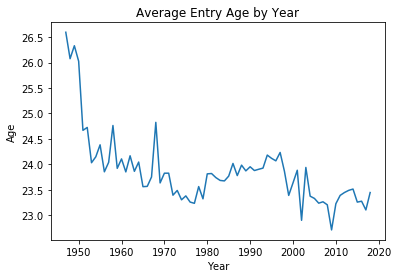

In [20]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")

plt.plot(year_strt, AverAge)
plt.show()

In [21]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
countByCollege.head()

,college,count
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


In [22]:
#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()
singleCollege_sum

171

In [23]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
top25colleges.head()

,college,count
0,University of Kentucky,99
1,University of California-Los Angeles,91
2,University of North Carolina at Chapel Hill,87
3,University of Kansas,72
4,Duke University,71


In [24]:
modeCollege_df = countByCollege['count'].sort_values(ascending=False)
modeCollege_df = modeCollege_df.reset_index(drop=True)
modeCollege = modeCollege_df.mode()
modeCollege = modeCollege.iloc[0]
modeCollege

1

<BarContainer object of 25 artists>

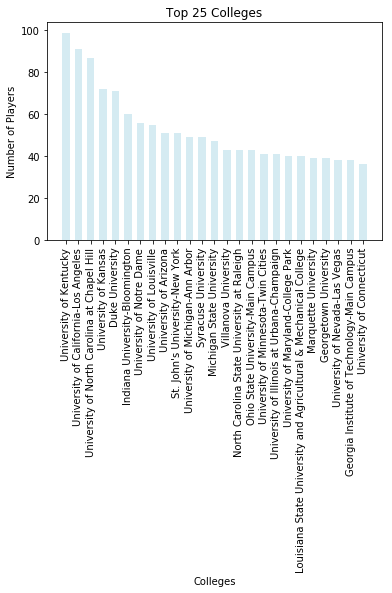

In [25]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [26]:
plt.savefig("top25colleges.png")

<Figure size 432x288 with 0 Axes>

In [32]:
#Budget data for top 25 colleges
top_25_college_budget_merged = pd.merge(top25colleges, complete_budget_data_merged, how="left", left_on="college", right_on="institution_name")
top_25_college_budget_merged.fillna(0, inplace=True)
top_25_college_budget_merged.head()

,college,count,institution_name,Revenue_2009,Expense_2009,Revenue_2010,Expense_2010,Revenue_2011,Expense_2011,Revenue_2012,...,Revenue_2013,Expense_2013,Revenue_2014,Expense_2014,Revenue_2015,Expense_2015,Revenue_2016,Expense_2016,Revenue_2017,Expense_2017
0,University of Kentucky,99,University of Kentucky,14773034.0,8615726.0,16781239.0,11573283.0,18557243.0,12355375.0,21598680.0,...,23201795.0,13672723.0,23655649.0,16198525.0,24684543.0,20009991.0,27239237.0,18910412.0,27965227.0,19180059.0
1,University of California-Los Angeles,91,University of California-Los Angeles,11775932.0,6996960.0,12353487.0,6277088.0,11621364.0,6702818.0,8375109.0,...,12369639.0,12717020.0,12168231.0,8376981.0,12228209.0,8256449.0,11318447.0,9032540.0,13416856.0,9856861.0
2,University of North Carolina at Chapel Hill,87,University of North Carolina at Chapel Hill,19852544.0,7488429.0,20551168.0,6647459.0,19672012.0,6510942.0,24011268.0,...,19632779.0,7811021.0,20905642.0,7276883.0,20771541.0,7470178.0,21342328.0,8667111.0,21408475.0,10293415.0
3,University of Kansas,72,University of Kansas,15737145.0,8219362.0,16116502.0,10984833.0,11535922.0,9513243.0,16443172.0,...,16412415.0,10724156.0,18253973.0,8479332.0,19141222.0,11273001.0,18020944.0,11636720.0,18266319.0,11126047.0
4,Duke University,71,Duke University,11842009.0,13873859.0,26667056.0,12286475.0,28917329.0,13819529.0,25665732.0,...,25735093.0,15170813.0,27000243.0,14187972.0,33772145.0,19860851.0,31033555.0,17890632.0,34398285.0,19507686.0


In [35]:
top_25_college_budget_merged['Total Budget'] = top_25_college_budget_merged['Expense_2009'] + top_25_college_budget_merged['Expense_2010'] + top_25_college_budget_merged['Expense_2011'] + top_25_college_budget_merged['Expense_2012'] + top_25_college_budget_merged['Expense_2013'] + top_25_college_budget_merged['Expense_2014'] + top_25_college_budget_merged['Expense_2015'] + top_25_college_budget_merged['Expense_2016'] + top_25_college_budget_merged['Expense_2017']
top_25_college_budget_merged['Total Revenue'] = top_25_college_budget_merged['Revenue_2009'] + top_25_college_budget_merged['Revenue_2010'] + top_25_college_budget_merged['Revenue_2011'] + top_25_college_budget_merged['Revenue_2012'] + top_25_college_budget_merged['Revenue_2013'] + top_25_college_budget_merged['Revenue_2014'] + top_25_college_budget_merged['Revenue_2015'] + top_25_college_budget_merged['Revenue_2016'] + top_25_college_budget_merged['Revenue_2017']
top_25_college_budget_merged.head()

,college,count,institution_name,Revenue_2009,Expense_2009,Revenue_2010,Expense_2010,Revenue_2011,Expense_2011,Revenue_2012,...,Revenue_2014,Expense_2014,Revenue_2015,Expense_2015,Revenue_2016,Expense_2016,Revenue_2017,Expense_2017,Total Budget,Total Revenue
0,University of Kentucky,99,University of Kentucky,14773034.0,8615726.0,16781239.0,11573283.0,18557243.0,12355375.0,21598680.0,...,23655649.0,16198525.0,24684543.0,20009991.0,27239237.0,18910412.0,27965227.0,19180059.0,135635182.0,198456647.0
1,University of California-Los Angeles,91,University of California-Los Angeles,11775932.0,6996960.0,12353487.0,6277088.0,11621364.0,6702818.0,8375109.0,...,12168231.0,8376981.0,12228209.0,8256449.0,11318447.0,9032540.0,13416856.0,9856861.0,75433455.0,105627274.0
2,University of North Carolina at Chapel Hill,87,University of North Carolina at Chapel Hill,19852544.0,7488429.0,20551168.0,6647459.0,19672012.0,6510942.0,24011268.0,...,20905642.0,7276883.0,20771541.0,7470178.0,21342328.0,8667111.0,21408475.0,10293415.0,69323056.0,188147757.0
3,University of Kansas,72,University of Kansas,15737145.0,8219362.0,16116502.0,10984833.0,11535922.0,9513243.0,16443172.0,...,18253973.0,8479332.0,19141222.0,11273001.0,18020944.0,11636720.0,18266319.0,11126047.0,94697414.0,149927614.0
4,Duke University,71,Duke University,11842009.0,13873859.0,26667056.0,12286475.0,28917329.0,13819529.0,25665732.0,...,27000243.0,14187972.0,33772145.0,19860851.0,31033555.0,17890632.0,34398285.0,19507686.0,142498916.0,245031447.0


<BarContainer object of 25 artists>

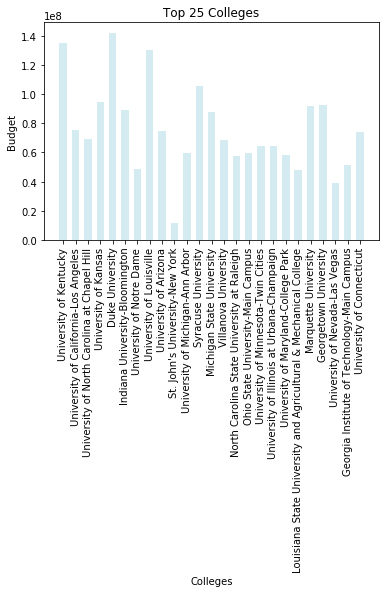

In [34]:

budget25colleges = top_25_college_budget_merged['college']
budget = top_25_college_budget_merged['Total Budget']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Budget")
plt.xticks(rotation=90)
#top25colleges['college']

plt.xticks(width, budget25colleges)
plt.bar(width, budget, color='lightblue', alpha=0.5, align="center", width=3)

In [42]:
df = top_25_college_budget_merged.loc[:, 'Total Budget':'Total Revenue']
df

,Total Budget,Total Revenue
0,135635182.0,198456647.0
1,75433455.0,105627274.0
2,69323056.0,188147757.0
3,94697414.0,149927614.0
4,142498916.0,245031447.0
5,89223066.0,182403142.0
6,48587760.0,33117121.0
7,130298115.0,353107879.0
8,75050831.0,195197973.0
9,11470853.0,11470853.0


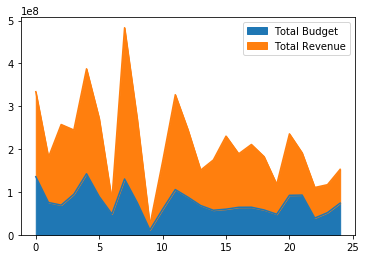

In [40]:
#top_25_college_budget_merged #kentucky at 0
#top_school = top_25_college_budget_merged
#df = top_25_college_budget_merged[0], columns=['Total Budget', 'Total Revenue']
 
# plot
df.plot.area()

In [45]:
combined_budget_2009_2017 = top_25_college_budget_merged['Total Budget'].sum()
combined_revenue_2009_2017 = top_25_college_budget_merged['Total Revenue'].sum()
print(f"The total basketball budget for the top 25 colleges from 2009-2017 is {combined_budget_2009_2017}. For the same time, the combined revenues is {combined_revenue_2009_2017}.")

The total basketball budget for the top 25 colleges from 2009-2017 is 1895025835.0. For the same time, the combined revenues is 3446596866.0.


In [ ]:
# Create new dataframe group just by type to plot
grouped = college_group_players_sorted25.groupby('College')

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types

#fig, ax = plt.subplots()
#colors = ["goldenrod","lightblue","lightcoral"] c=colors[color_index],
#color_index = 0
for name, group in grouped:
    plt.scatter(group.College, group.Total, marker='o', s=group.Total, label=name, edgecolors="black", alpha=0.85)
    #color_index += 1
    
# Incorporate the other graph properties    
plt.grid(True)
#plt.ylim(18,44)
#plt.xlim(1,44)
plt.title("Players per Year")
plt.xlabel("Years")
plt.ylabel("Number of Players")

# Create a legend
#plt.legend(title='City Types', markerscale=0.3)

# Incorporate a text label regarding circle size
#plt.annotate(" Note:", xy=(44, 32))
#plt.annotate(" Circle size correlates with driver count per city.", xy=(44, 30))
#
# Save Figure
#plt.savefig("pyber_scatter.png", bbox_inches="tight")


In [ ]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
top25colleges

In [ ]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges

In [ ]:
top25colleges.to_csv("output-latlong-25.csv")

In [ ]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [ ]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig